In [ ]:
""" 
Help sites: 
1. Capturing mouse event: https://www.pyimagesearch.com/2015/03/09/capturing-mouse-click-events-with-python-and-opencv/
2. Writing text on image: https://stackoverflow.com/questions/16615662/how-to-write-text-on-a-image-in-windows-using-python-opencv2
3. Saving list in pickle file: https://stackoverflow.com/questions/899103/writing-a-list-to-a-file-with-python
4. Camera distortion calibration: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
5. Wrap Perspective Transform: https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?
6. Data type, list, dict, tuple, set: https://data-flair.training/blogs/python-data-structures-tutorial/
7. Drawing rectangle, line and circle patches: https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
"""

##DATABASE: [FrameNum, NumAcotor, (leftFoot(X,Y), rightFoot(X,Y))]
%matplotlib inline
import cv2
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

tot_agent = 100
refPt     = []
agentpath = [[] for i in range(tot_agent)]
cur_agent_num = None

def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global refPt, cropping, frame_count, agent_list, tot_agent, cur_agent_num
    
    #if len(agent_list)> 0 and len(agent_list) > cur_agent_num:
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Left Button", x, y)
        refPt = [(x, y)]

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:    # record the ending (x, y) coordinates 
        print("Right Button", x, y)
        refPt.append((x, y))
        #draw line (between left and right foot) and agent number on the image
        #cv2.line(frame, refPt[0], refPt[1], (0,255,0), 2) #lineThickness = 2
        #cv2.putText(frame, str(agent_list[cur_agent_num]), refPt[0], cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        #agentpath[agent_list[cur_agent_num]-1].append((frame_count, agent_list[cur_agent_num]-1, refPt))
        #cur_agent_num = cur_agent_num + 1
        #cv2.imshow("image", frame)


cap = cv2.VideoCapture('sciencemuseum10july.mp4')
cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)

tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width     = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height    = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps       = cap.get(cv2.CAP_PROP_FPS)

frame_count = 0
img_reset   = 0
vid_reset   = 0
agent_list  = []

while(cap.isOpened()):
    if not img_reset:
        ret, frame    = cap.read()
        ret, frame    = cap.read()
        clone         = frame.copy()
        frame_count   = frame_count + 2
        cur_agent_num = 0
    
    while True:
        # display the image and wait for a keypress
        cv2.imshow("image", frame)
        key = cv2.waitKey(1) & 0xFF
        img_reset = 0
        
        if key == ord("r"):              # reset the image frame region
            frame = clone.copy()
            cur_agent_num = 0
            img_reset = 1
            
        elif key == ord("n"):            # break from the loop and load a new frame
            #clear the stored data in current list
            print("Current Agents in Frame:: ", agent_list)
            break
            
        elif key == ord("q") or frame_count == tot_frame: ####save and exit####
            with open('agentpath', 'wb') as fp:
                pickle.dump(agentpath, fp)
            cap.release()
            cv2.destroyAllWindows()
            sys.exit("Terminated by user")
            
        elif key == ord("a"):            # add a new agent
            x = int(input())             # need to check if input is an integer<<<
            if not agent_list.count(x):
                agent_list.append(x)
                print("Current Agents in Frame:: ", agent_list)
                
        elif key == ord("d"):            # delete an old agent
            x = int(input())
            if agent_list.count(x):
                agent_list.remove(x)
                print("Current Agents in Frame:: ", agent_list)
                
            
cap.release()
cv2.destroyAllWindows()

Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Agents in Frame::  []
Current Ag

(856, 1438, 3)
Left Button 307 119
Left Button 1156 116
Left Button 60 843
Left Button 1337 816


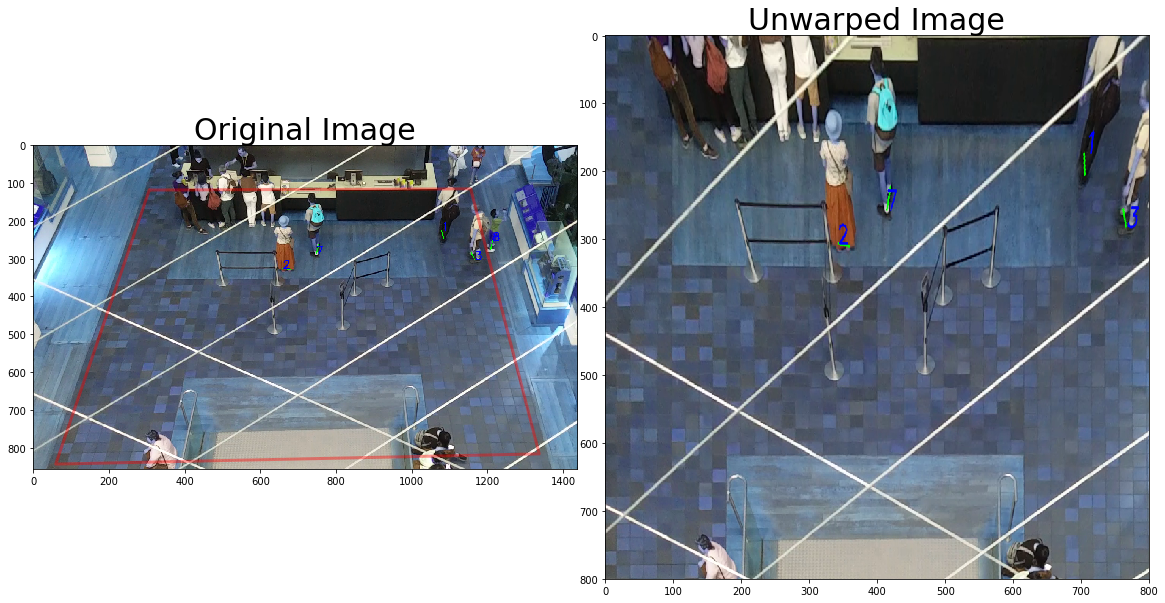

In [1]:
"""
Help sites: 
Perspective transform correction: https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/
https://stackoverflow.com/questions/22656698/perspective-correction-in-opencv-using-python
https://www.learnopencv.com/homography-examples-using-opencv-python-c/#download
"""
%matplotlib inline
import cv2
import pickle
import matplotlib.pyplot as plt
import numpy as np

tot_count = 0
refPt     = []

def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global tot_count
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Left Button", x, y)
        refPt.append((x, y))
        tot_count = tot_count + 1

def unwarp(img, src, dst, testing = False):
    h, w = img.shape[:2]
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (800, 800), flags=cv2.INTER_LINEAR)

    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title('Original Image', fontsize=30)
        ax2.imshow(cv2.flip(warped, 1))
        ax2.set_title('Unwarped Image', fontsize=30)
        plt.show()
        return warped, M
    else:
        return warped, M

im = cv2.imread("sciencemuseum10july.png")
cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)
#w, h = im.shape[0], im.shape[1]
print(im.shape)
dst = np.float32([(800, 0), (0, 0), (800, 800), (0, 800)])
while True:
    cv2.imshow("image", im)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if tot_count == 4:
        src = np.float32(refPt)
        break

warpImg, tfmat = unwarp(im, src, dst, True)
with open('TFmat', 'wb') as fp:
    pickle.dump(tfmat, fp)
            
cv2.imshow("so", cv2.flip(warpImg, 1))
cv2.waitKey(1)
cv2.destroyAllWindows()

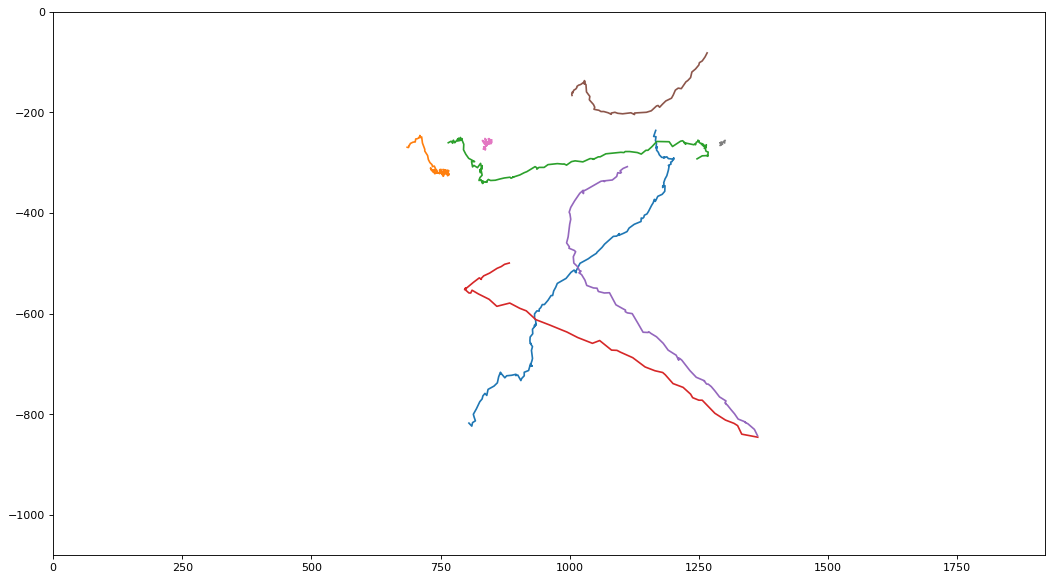

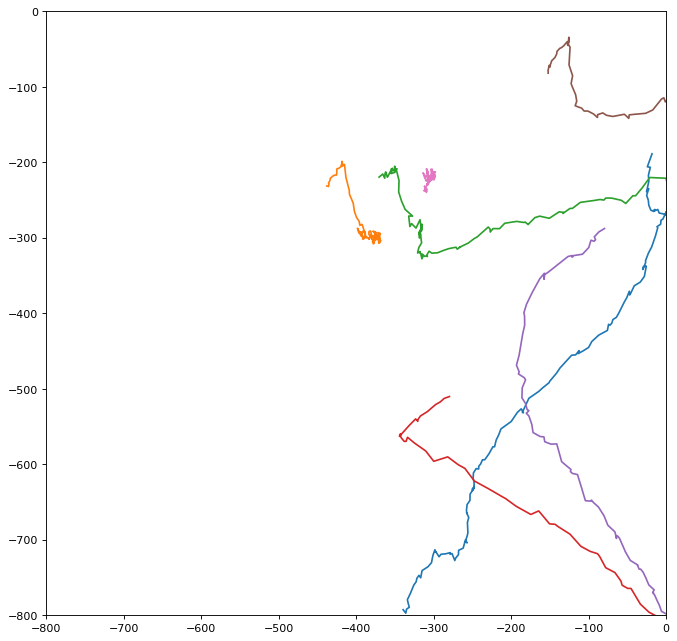

In [3]:
#Plot the 4 corner points which kind of limits the extent of the plots

%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open ('agentpath_part1_278frames', 'rb') as fp:
    agentpath = pickle.load(fp)

with open ('perspectiveTFmat_31july', 'rb') as fp:
    tfmat = pickle.load(fp)

"""
Function: Smooth the path travelled by an agent
"""
def smoothPath(path):
    return path


actor_num = 8

plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
for i in range(actor_num):
    midpoint    = []
    new = old   = []
    for a, b, c in agentpath[i]:
        new = a
        if new == old:   #correct for any resets during manual marking
            midpoint.pop()
            
        xy    = (x,y) = ((c[1][0] + c[0][0])/2, (c[1][1] + c[0][1])/2)
        midpoint.append(xy)
        old   = new

    xx = np.array(midpoint).T
    plt.plot(xx[0], -1*xx[1])  

plt.xlim((0, 1920))
plt.ylim((-1080, 0))

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
for i in range(actor_num):
    tf_midpoint = []
    new = old   = []
    for a, b, c in agentpath[i]:
        new = a
        if new == old:   #correct for any resets during manual marking
            tf_midpoint.pop()
        xy    = (x,y) = ((c[1][0] + c[0][0])/2, (c[1][1] + c[0][1])/2)
        tf_xy = (sum(tfmat[0]*(x,y,1))/sum(tfmat[2]*(x,y,1)), sum(tfmat[1]*(x,y,1))/sum(tfmat[2]*(x,y,1)))
        tf_midpoint.append(tf_xy)
        old   = new
        
    xx = np.array(tf_midpoint).T
    plt.plot(-1*xx[0], -1*xx[1])
    
plt.xlim((-800, 0))
plt.ylim((-800, 0))
plt.show()

In [72]:
cord = [(514, 302),
        (662, 304),
        (654, 434),
        (956, 313),
        (869, 337),
        (836, 428),
        (424, 711),
        (458, 708),
        (1020, 702),
        (986, 705),
        (652, 447),
        (674, 433),
        (633, 434),
        (659, 420),
        (640, 424),
        (639, 443),
        (667, 443),
        (649, 445),]

# load the perspective transformation matrix
with open ('perspectiveTFmat_31july', 'rb') as fp:
    tfmat = pickle.load(fp)
    
tf_pt = []
for x,y in cord:
    tf_xy = (-1*sum(tfmat[0]*(x,y,1))/sum(tfmat[2]*(x,y,1)) + 800, #flip and shift
             -1*sum(tfmat[1]*(x,y,1))/sum(tfmat[2]*(x,y,1)) + 800)
    tf_pt.append(tf_xy)
    print(tf_xy)

(221.5969104682739, 526.5677653021952)
(344.45367511461654, 522.3522036979191)
(346.31281923826464, 363.96870786990866)
(589.2896207612645, 507.3368836524182)
(515.7602141467573, 477.3860653326148)
(486.73302899621484, 368.43625560439943)
(208.8643608881274, 98.066633687239)
(230.9233777954987, 100.06799076606421)
(605.4560748033757, 96.55418049215211)
(582.3709178394364, 94.53620247165372)
(345.5684077266225, 349.44319865220655)
(361.6330258827254, 364.8413156541963)
(330.1843350937881, 364.2373363593663)
(349.3318893147999, 379.8221104069271)
(334.8884071918326, 375.4885034833937)
(335.3922451380941, 354.0651937977282)
(356.7936598513258, 353.7036349370437)
(343.1571198109889, 351.7065478939783)


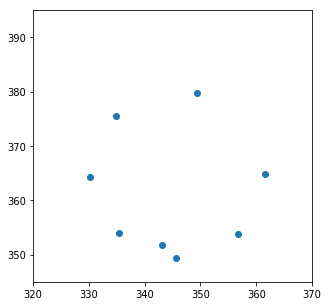

346.09618785776064 365.32147197304766 15.261529419851815


In [73]:
"""
Finding circle centre and radius using least square method: https://meshlogic.github.io/posts/jupyter/curve-fitting/fitting-a-circle-to-cluster-of-3d-points/

Function: To determine the circle parameters i.e. centre and radius based on set of circumference points
Input: set of X coordinates, set of y coordinates
"""
def fit_circle_2d(x, y, w=[]):
    
    A = np.array([x, y, np.ones(len(x))]).T
    b = x**2 + y**2
    
    # Modify A,b for weighted least squares
    if len(w) == len(x):
        W = np.diag(w)
        A = np.dot(W,A)
        b = np.dot(W,b)
    
    # Solve by method of least squares
    c = np.linalg.lstsq(A,b,rcond=None)[0]
    
    # Get circle parameters from solution c
    xc = c[0]/2
    yc = c[1]/2
    r = np.sqrt(c[2] + xc**2 + yc**2)
    return xc, yc, r

fig = plt.figure(figsize=(5,5))
plt.scatter(np.array(tf_pt)[10:18].T[0], np.array(tf_pt)[10:18].T[1])
plt.xlim(320, 370)
plt.ylim(345, 395)
pt = np.array(tf_pt)[11:18].T
xc, yc, r = fit_circle_2d(pt[0], pt[1])
plt.show()
print(xc, yc, r)

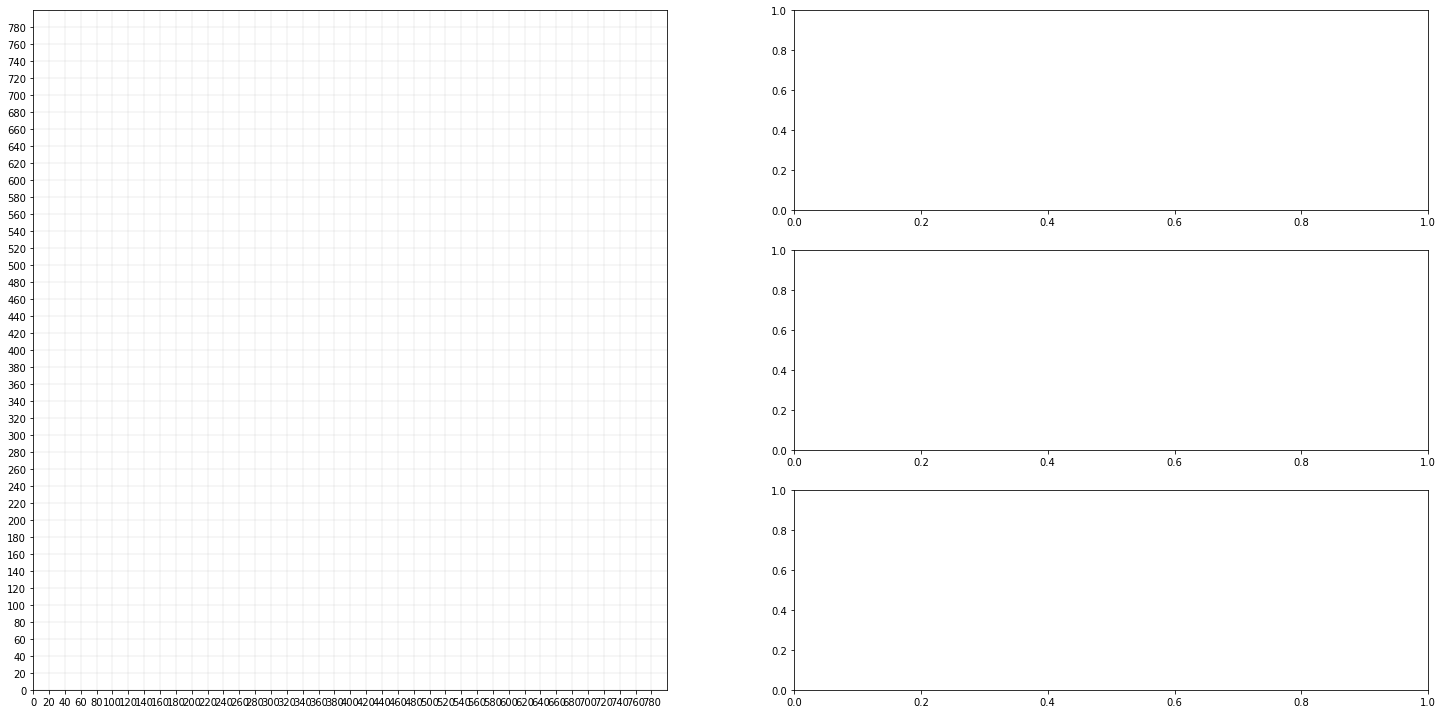

In [28]:
import matplotlib.pyplot as plt

X = [ (1,2,1), (3,2,2), (3,2,4), (3,2,6) ]
fig = plt.figure(figsize=(25,12.5))
sub = []
for nrows, ncols, plot_number in X:
    f = fig.add_subplot(nrows, ncols, plot_number)
    sub.append(f)

sub[0].set_xticks(np.arange(0, 800, 20))
sub[0].set_yticks(np.arange(0, 800, 20))
sub[0].set_xlim((0,800))    
sub[0].set_ylim((0,800))
sub[0].grid(True, linewidth=.2)